# Customer Purchase Prediction using Logistic Regression

### Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

### Load the dataset

In [2]:
file_path = "C:\\Users\\ramana777\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(file_path)

### Basic Data exploration

In [3]:
print("Data:")
print(data)

Data:
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1  

In [4]:
print("Columns Names:")
data.columns.tolist()

Columns Names:


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [5]:
print("First Five Rows:")
print(data.head())

First Five Rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies    

### Data Preprocessing

##### Drop customerID as it is not relevant for modeling

In [6]:
data.drop('customerID',axis=1,inplace=True)

##### Convert TotalCharges to numeric for handling errors

In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

### Missing Value Analysis

In [8]:
print("Missing Values:")
data.isnull().sum()

Missing Values:


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

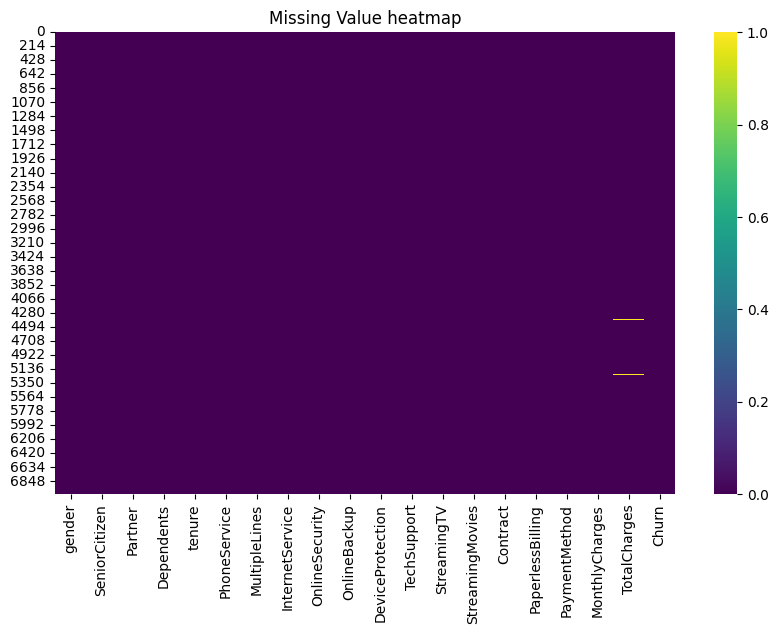

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cmap="viridis",cbar=True)
plt.title("Missing Value heatmap")
plt.show()

In [10]:
data['TotalCharges'].fillna(data['TotalCharges'].median(),inplace=True)

In [11]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Categorical Encoding

In [12]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Churn':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [13]:
le_churn = LabelEncoder()
data['Churn'] = le_churn.fit_transform(data['Churn'])

##### Define features(X) and target(y)

In [14]:
X = data.drop('Churn',axis=1)
y = data['Churn']

##### Split the dataset into training and testing sets

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

##### Define the logistic regression pipeline

In [16]:
logistic_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('classifier',LogisticRegression(random_state=42))
])

##### Define the parameter grid for logistic regression

In [17]:
logistic_param_grid = {
    'classifier__C' : [0.01,0.1,1,10,100],
    'classifier__solver' : ['liblinear','lbfgs']
}

##### Perform gridSearchCV for logistic regression

In [18]:
logistic_grid_search = GridSearchCV(logistic_pipeline,logistic_param_grid,cv=5,scoring='accuracy',n_jobs=-1)
logistic_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

##### Best logistic regression model

In [19]:
logistic_best_model = logistic_grid_search.best_estimator_
logistic_best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=1, random_state=42))])

In [20]:
y_pred_logistic = logistic_best_model.predict(X_test)
y_pred_proba_logistic = logistic_best_model.predict_proba(X_test)[:,1]

##### Logistic Regression Evaluation

In [21]:
print("Logistic Regression Best Parameters:", logistic_grid_search.best_params_)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nLogistic Regression Precision:", precision_score(y_test, y_pred_logistic))
print("\nLogistic Regression Recall:", recall_score(y_test, y_pred_logistic))
print("\nLogistic Regression F1 Score:", f1_score(y_test, y_pred_logistic))
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("\nLogistic Regression AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba_logistic))

Logistic Regression Best Parameters: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}

Logistic Regression Accuracy: 0.8029528676888131

Logistic Regression Precision: 0.6492537313432836

Logistic Regression Recall: 0.5588865096359743

Logistic Regression F1 Score: 0.6006904487917146

Logistic Regression Confusion Matrix:
 [[1153  141]
 [ 206  261]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1294
           1       0.65      0.56      0.60       467

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.80      0.80      0.80      1761


Logistic Regression AUC-ROC Score: 0.8440752741197224


##### Plot ROC Curve

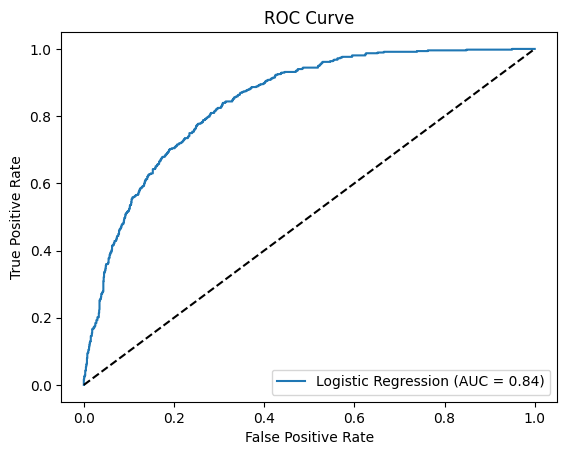

In [22]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_logistic)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba_logistic)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Additional Models:Random Forest and Gradient Boosting

##### Random Forest Pipeline

In [23]:
rf_pipeline = Pipeline([
    ('sclaer',StandardScaler()),
    ('classifier',RandomForestClassifier(random_state=42))
])

In [24]:
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

In [25]:
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sclaer', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [26]:
rf_best_model = rf_grid_search.best_estimator_
rf_best_model

Pipeline(steps=[('sclaer', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, random_state=42))])

##### Gradient Boosting Pipeline

In [27]:
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [28]:
gb_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

In [29]:
gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [30]:
gb_best_model = gb_grid_search.best_estimator_
gb_best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            n_estimators=300,
                                            random_state=42))])

### Preictions and Evaluation for Additional Models

In [31]:
rf_y_pred = rf_best_model.predict(X_test)
rf_y_pred_proba = rf_best_model.predict_proba(X_test)[:, 1]
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("\nRandom Forest Precision:", precision_score(y_test, rf_y_pred))
print("\nRandom Forest Recall:", recall_score(y_test, rf_y_pred))
print("\nRandom Forest F1 Score:", f1_score(y_test, rf_y_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_y_pred))
print("\nRandom Forest AUC-ROC Score:", roc_auc_score(y_test, rf_y_pred_proba))


Random Forest Accuracy: 0.7950028392958546

Random Forest Precision: 0.6505681818181818

Random Forest Recall: 0.49036402569593146

Random Forest F1 Score: 0.5592185592185592

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1294
           1       0.65      0.49      0.56       467

    accuracy                           0.80      1761
   macro avg       0.74      0.70      0.71      1761
weighted avg       0.78      0.80      0.78      1761


Random Forest AUC-ROC Score: 0.8396635434835131


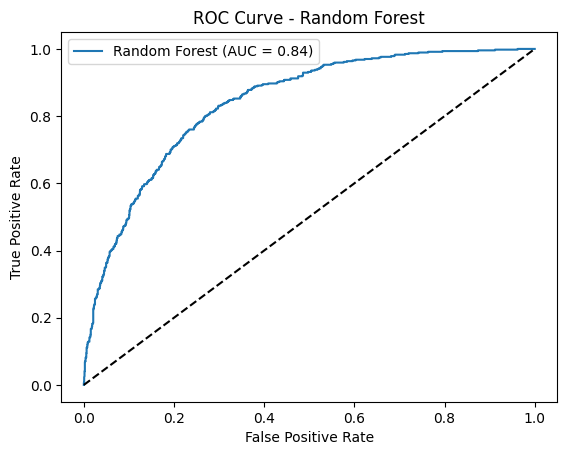

In [32]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_pred_proba)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, rf_y_pred_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

In [33]:
gb_y_pred = gb_best_model.predict(X_test)
gb_y_pred_proba = gb_best_model.predict_proba(X_test)[:, 1]
print("\nGradient Boosting Accuracy:", accuracy_score(y_test, gb_y_pred))
print("\nGradient Boosting Precision:", precision_score(y_test, gb_y_pred))
print("\nGradient Boosting Recall:", recall_score(y_test, gb_y_pred))
print("\nGradient Boosting F1 Score:", f1_score(y_test, gb_y_pred))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, gb_y_pred))
print("\nGradient Boosting AUC-ROC Score:", roc_auc_score(y_test, gb_y_pred_proba))


Gradient Boosting Accuracy: 0.7955706984667802

Gradient Boosting Precision: 0.6825938566552902

Gradient Boosting Recall: 0.4282655246252677

Gradient Boosting F1 Score: 0.5263157894736842

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      1294
           1       0.68      0.43      0.53       467

    accuracy                           0.80      1761
   macro avg       0.75      0.68      0.70      1761
weighted avg       0.78      0.80      0.78      1761


Gradient Boosting AUC-ROC Score: 0.8436698450102433


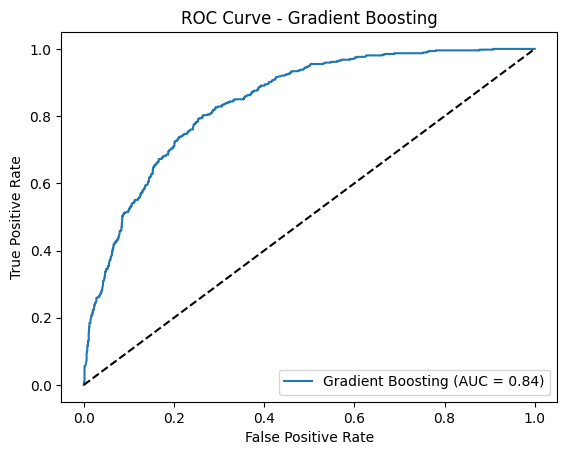

In [34]:
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_y_pred_proba)
plt.figure()
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_score(y_test, gb_y_pred_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.show()

### Testing the Best Logistic model on Test Data

### Load and read the Test Data

In [35]:
file_path = "C:\\Users\\ramana777\\Downloads\\Test-Customer-Churn.xlsx"
data = pd.read_excel(file_path)

In [36]:
print(data)

     customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0             0       0              0        1           0      47   
1             1       1              0        0           1      12   
2             2       0              0        0           1      62   
3             3       0              1        0           0       8   
4             4       0              0        0           0      21   
..          ...     ...            ...      ...         ...     ...   
495         495       0              0        0           0      38   
496         496       0              0        1           1      23   
497         497       1              1        1           0      45   
498         498       0              1        0           0      52   
499         499       1              0        0           0      50   

     PhoneService  MultipleLines  InternetService  OnlineSecurity  \
0               1              1                0               0   
1        

### Transform and Predict the Data

In [45]:
data_scaled = logistic_best_model.named_steps['scaler'].transform(data)
data_preds = logistic_best_model.named_steps['classifier'].predict(data_scaled)
data_preds_proba = logistic_best_model.named_steps['classifier'].predict_proba(data_scaled)[:, 1]

In [46]:
data['Predicted_Churn'] = data_preds
data['Churn_Probability'] = data_preds_proba

In [47]:
print("\nData with Predictions:\n")
print(data.head())


Data with Predictions:

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0      47             1   
1       1              0        0           1      12             1   
2       0              0        0           1      62             0   
3       0              1        0           0       8             1   
4       0              0        0           0      21             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              1                0               0             0  ...   
1              1                2               0             1  ...   
2              1                1               1             0  ...   
3              1                2               1             1  ...   
4              0                1               1             0  ...   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0            

### Visualization and evaluation of Predicted Data

C:\Users\ramana777\AppData\Local\Temp\ipykernel_13012\291839860.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted_Churn', data=data, palette='viridis')


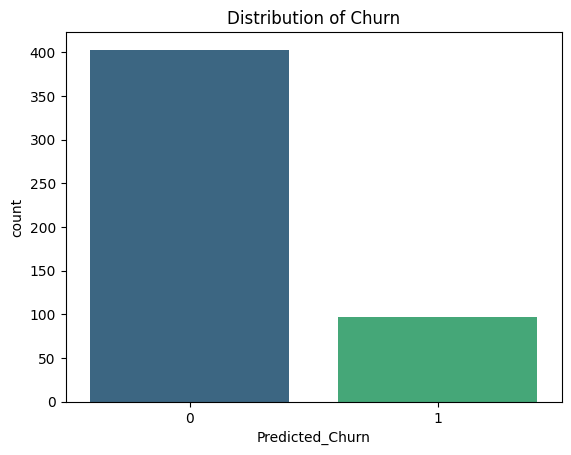

In [48]:
sns.countplot(x='Predicted_Churn', data=data, palette='viridis')
plt.title('Distribution of Churn')
plt.show()

In [50]:
data_true = data['Predicted_Churn']
accuracy = accuracy_score(data_true, data_preds)
precision = precision_score(data_true, data_preds)
recall = recall_score(data_true, data_preds)
f1 = f1_score(data_true, data_preds)
roc_auc = roc_auc_score(data_true, data_preds_proba)
conf_matrix = confusion_matrix(data_true, data_preds)
classification_rep = classification_report(data_true, data_preds)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Confusion Matrix:
[[403   0]
 [  0  97]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00        97

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



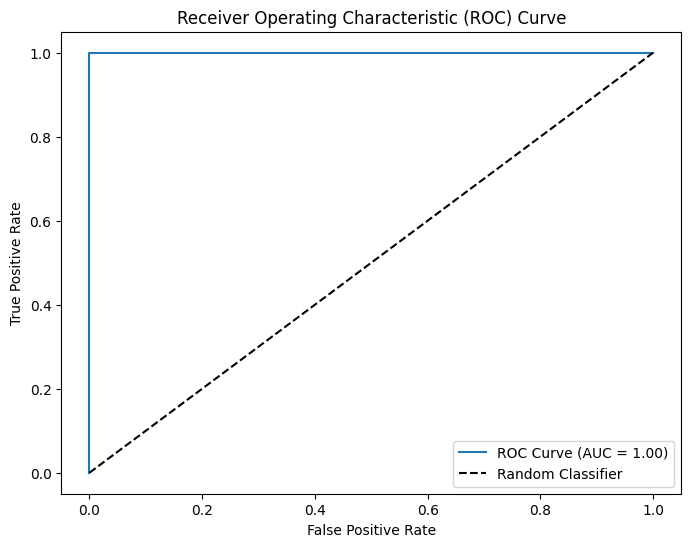

In [51]:
fpr, tpr, thresholds = roc_curve(data_true, data_preds_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="best")
plt.show()